# Informativity of IRAM 30m EMIR observations

In [1]:
import os
import sys
import yaml

sys.path.insert(0, os.path.join(".."))

import matplotlib.pyplot as plt

from infobs.informativity import Infobs
from infobs.instruments import IRAM30mEMIR
from infobs.graphics import Settings
from infobs.sampling import Constant, LogUniform

Settings.rotational_only = True

short = False  # Set to True to hide line transitions

## Instrument

In [2]:
linewidth = 10  # km/s

instrument = IRAM30mEMIR(linewidth)

## Simulator

In [3]:
n_samples = 10_000

samplers = {
    "Av": LogUniform(1, 25),
    "G0": LogUniform(1e1, 1e3),
    "Pth": LogUniform(1e5, 5e6),
    "angle": Constant(0.0),
}

In [4]:
with open(os.path.join("informativity", "regimes.yaml"), "r") as f:
    regimes = yaml.safe_load(f)

print("Physical regimes")
for name, desc in regimes.items():
    print(f"{name}: {desc}")

Physical regimes
all: {'Av': [None, None]}
diffuse: {'Av': [None, 3]}
translucent: {'Av': [3, 6]}
filamentary: {'Av': [6, 12]}
dense: {'Av': [12, None]}


## Studied lines

In [5]:
instrument.available_molecules()

['c_c3h2',
 'so',
 'c2h',
 'hcn',
 'hcop',
 'hnc',
 'cs',
 '13c_18o',
 'c_18o',
 '13c_o',
 'cn',
 'co',
 'h2o',
 'h2_18o',
 'n']

In [6]:
lines = instrument.available_lines(["co", "13c_o", "c_18o"])
lines.sort()
lines

['13c_o_j1__j0',
 '13c_o_j2__j1',
 '13c_o_j3__j2',
 'c_18o_j1__j0',
 'c_18o_j2__j1',
 'c_18o_j3__j2',
 'co_v0_j1__v0_j0',
 'co_v0_j2__v0_j1',
 'co_v0_j3__v0_j2',
 'co_v1_j1__v1_j0',
 'co_v1_j2__v1_j1',
 'co_v1_j3__v1_j2']

In [7]:
lines = [line for line in lines if "v1" not in line]
lines

['13c_o_j1__j0',
 '13c_o_j2__j1',
 '13c_o_j3__j2',
 'c_18o_j1__j0',
 'c_18o_j2__j1',
 'c_18o_j3__j2',
 'co_v0_j1__v0_j0',
 'co_v0_j2__v0_j1',
 'co_v0_j3__v0_j2']

## Definition of instances of `Infobs`

### Reference use case

In [8]:
infobs = Infobs(instrument, n_samples, samplers, obstime=30)

infobs.set_path(os.path.join("informativity", "data"))

infobs.set_regimes(regimes)

### Deep integration

In [9]:
infobs_integ = Infobs(instrument, n_samples, samplers, obstime=300)

infobs_integ.set_path(os.path.join("informativity", "data-integration"))

infobs_integ.set_regimes(regimes)

### Excellent observing conditions

In [10]:
infobs_ipwv = Infobs(IRAM30mEMIR(linewidth, ipwv=0), n_samples, samplers, obstime=30)

infobs_ipwv.set_path(os.path.join("informativity", "data-ipwv"))

infobs_ipwv.set_regimes(regimes)

## Informativity of CO isotopologues lines

### Simple informativity plot

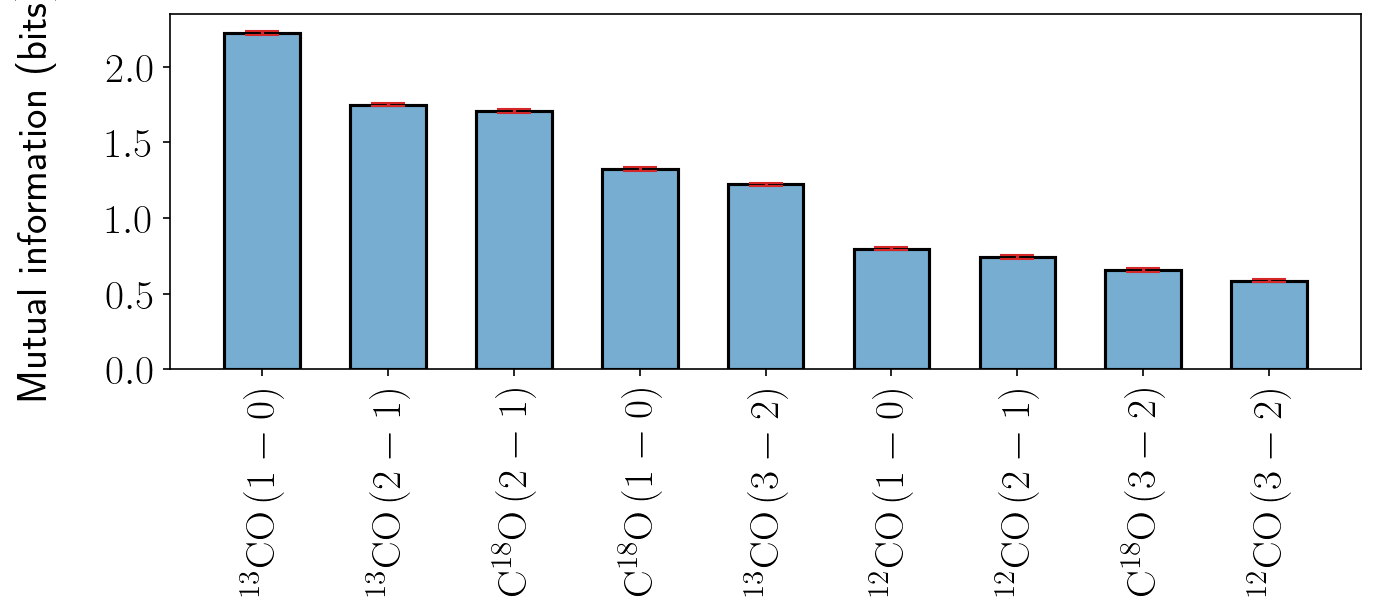

In [11]:
plt.figure(figsize=(1.6 * 6.4, 1.6 * 0.4 * 4.8), dpi=150)

infobs.plot_info_bars(
    lines,
    "Av",
    restriction="all",
    errorbars=True,
    nfirst=None,
    display_transitions=True,
)

plt.show()

### Influence of integration time

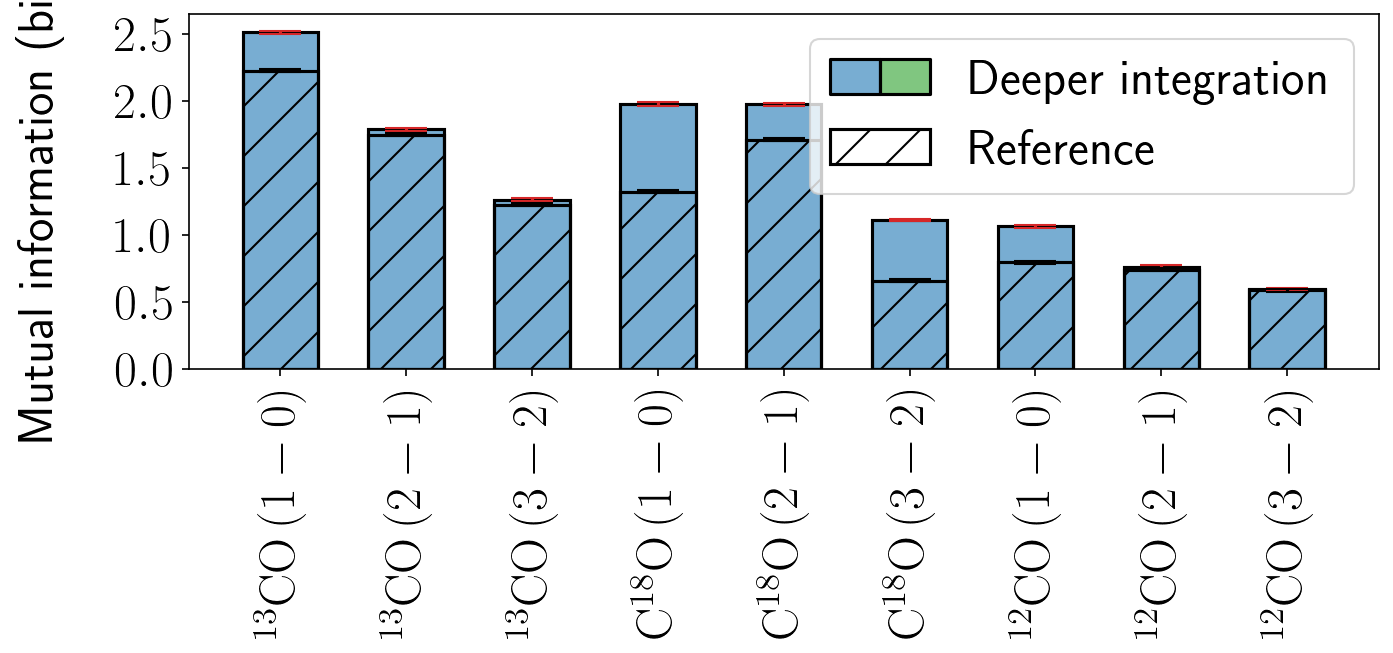

In [12]:
plt.figure(figsize=(1.6 * 6.4, 1.6 * 0.4 * 4.8), dpi=150)

infobs_integ.plot_info_bars_comparison(
    infobs,
    lines,
    "Av",
    restriction="all",
    errorbars=True,
    labels=["Deeper integration", "Reference"],
    display_transitions=True,
)

plt.show()

### Influence of observing conditions

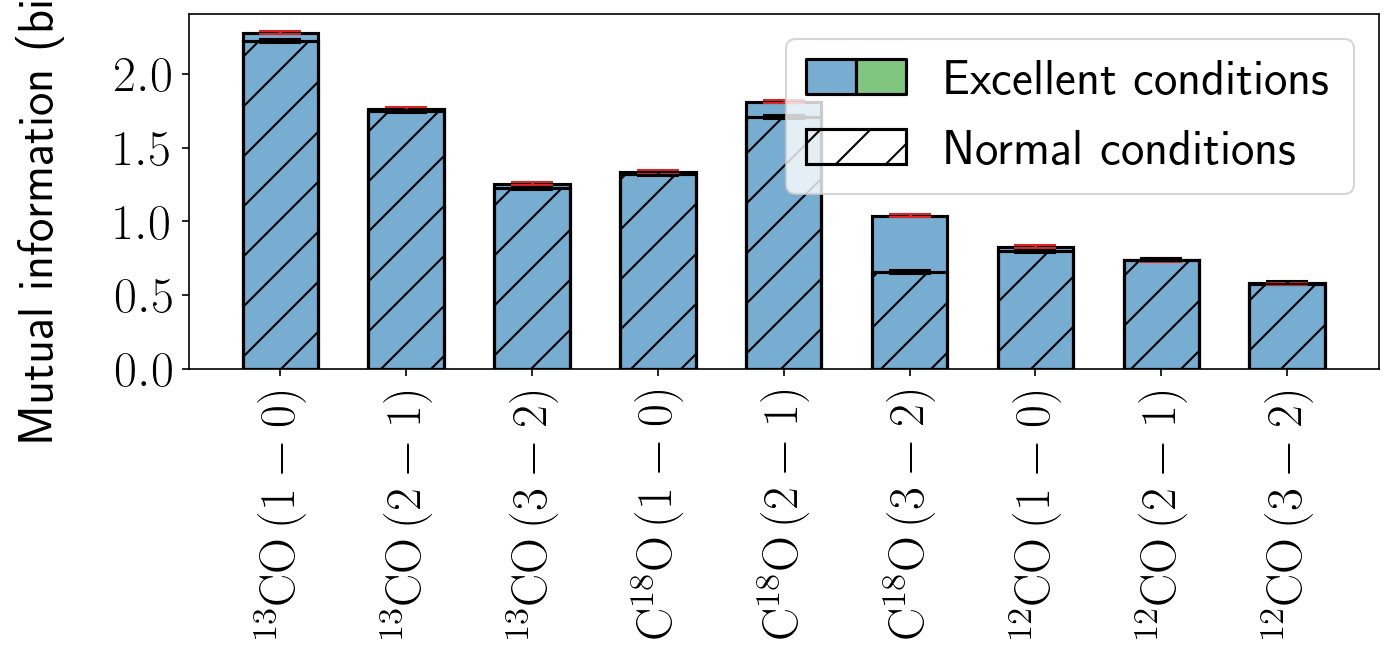

In [13]:
plt.figure(figsize=(1.6 * 6.4, 1.6 * 0.4 * 4.8), dpi=150)

infobs_ipwv.plot_info_bars_comparison(
    infobs,
    lines,
    "Av",
    restriction="all",
    errorbars=True,
    labels=["Excellent conditions", "Normal conditions"],
    display_transitions=True,
)

plt.show()

### Influence of combining lines

In [14]:
import itertools as itt

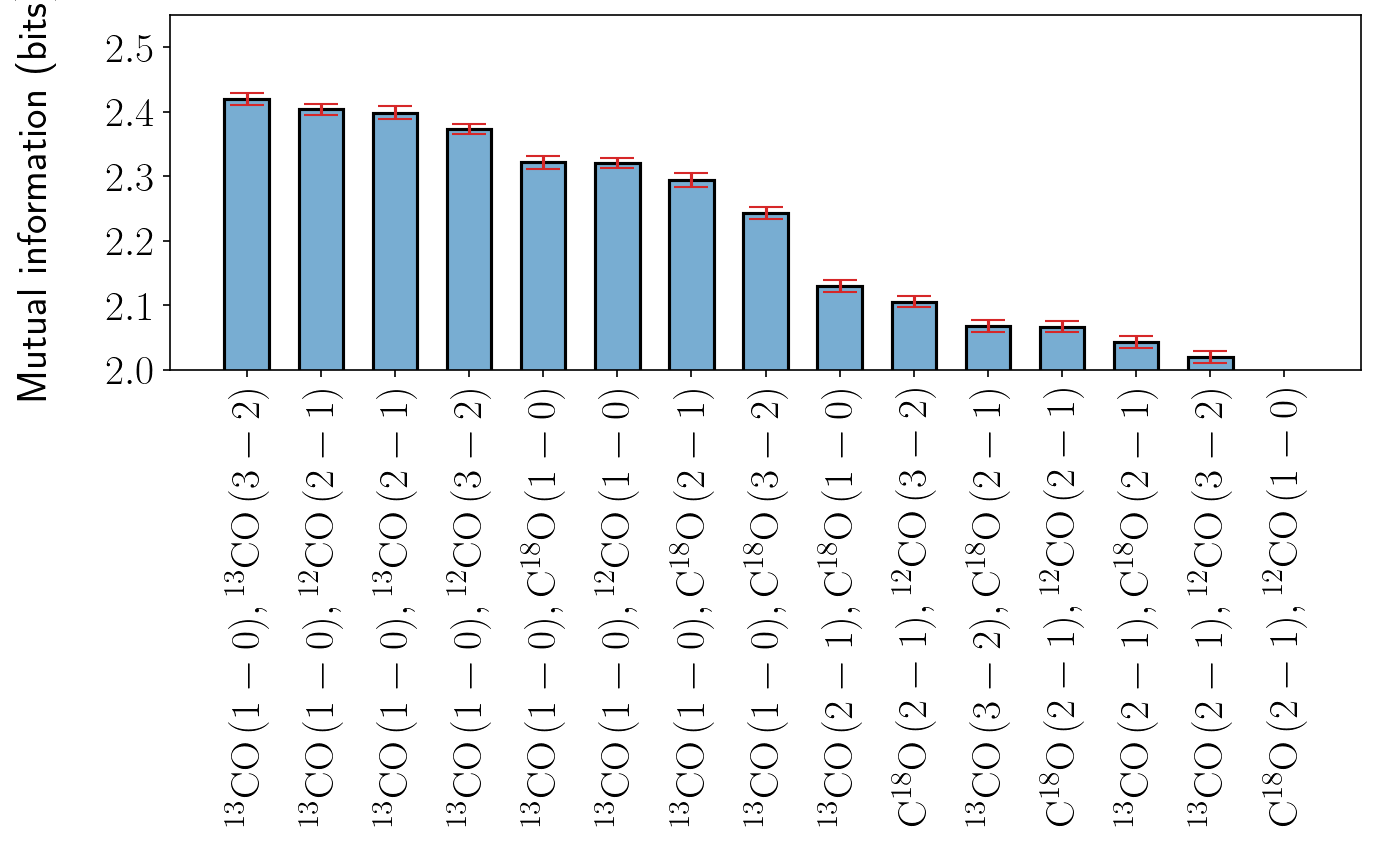

In [15]:
plt.figure(figsize=(1.6 * 6.4, 1.6 * 0.4 * 4.8), dpi=150)

infobs.plot_info_bars(
    itt.combinations(lines, 2),
    "Av",
    restriction="all",
    errorbars=True,
    nfirst=15,  # Display only the 20 most informative lines
    display_transitions=True,
    bottom_val=2.0,
)

plt.show()

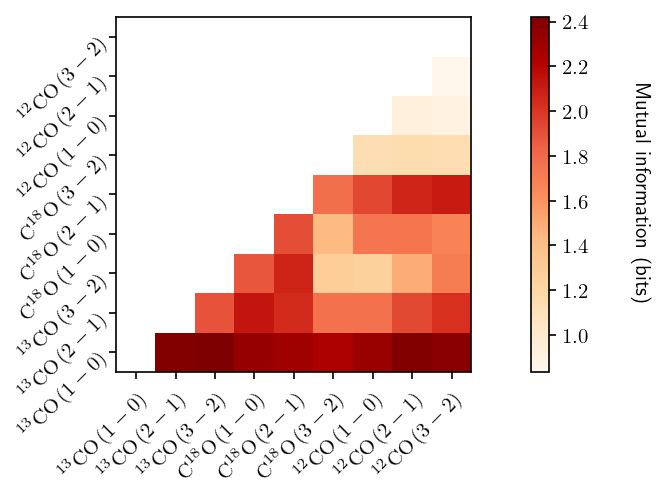

In [16]:
plt.figure(figsize=(1.6 * 6.4, 1.6 * 0.4 * 4.8), dpi=150)

infobs.plot_info_matrix(lines, "Av", restriction="all", display_transitions=True)

plt.show()

### Influence of physical regime

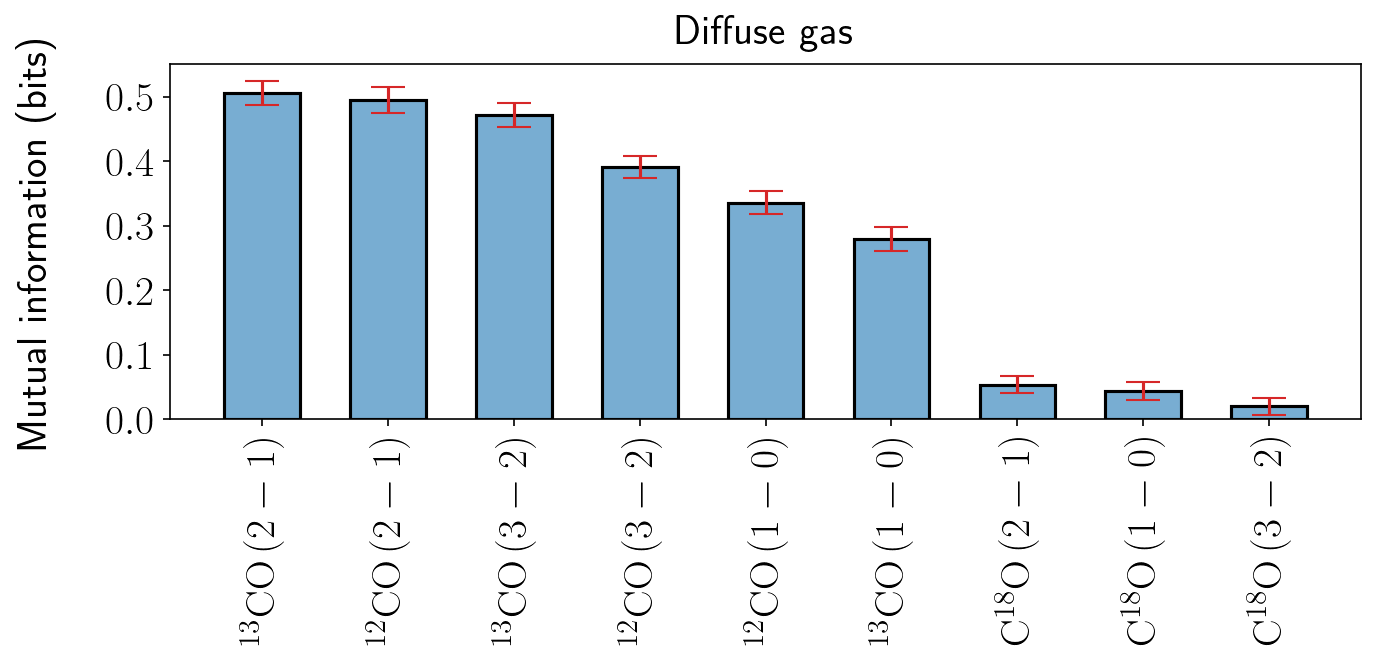

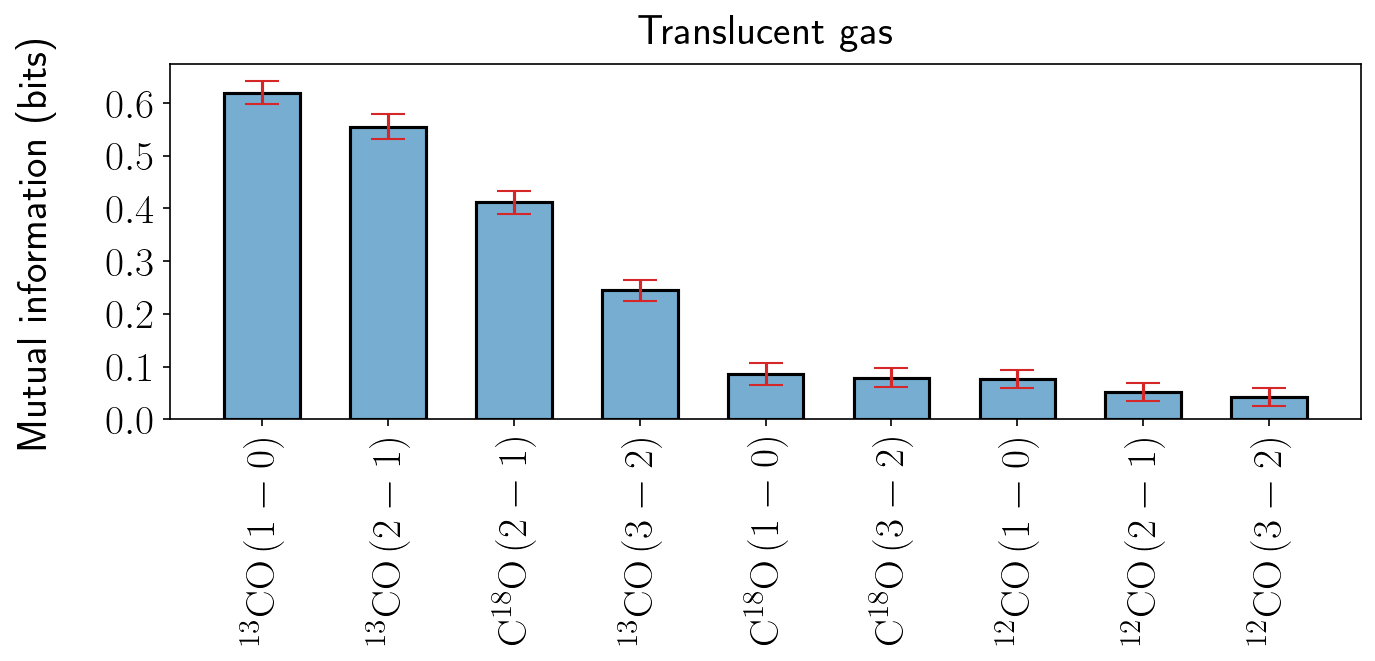

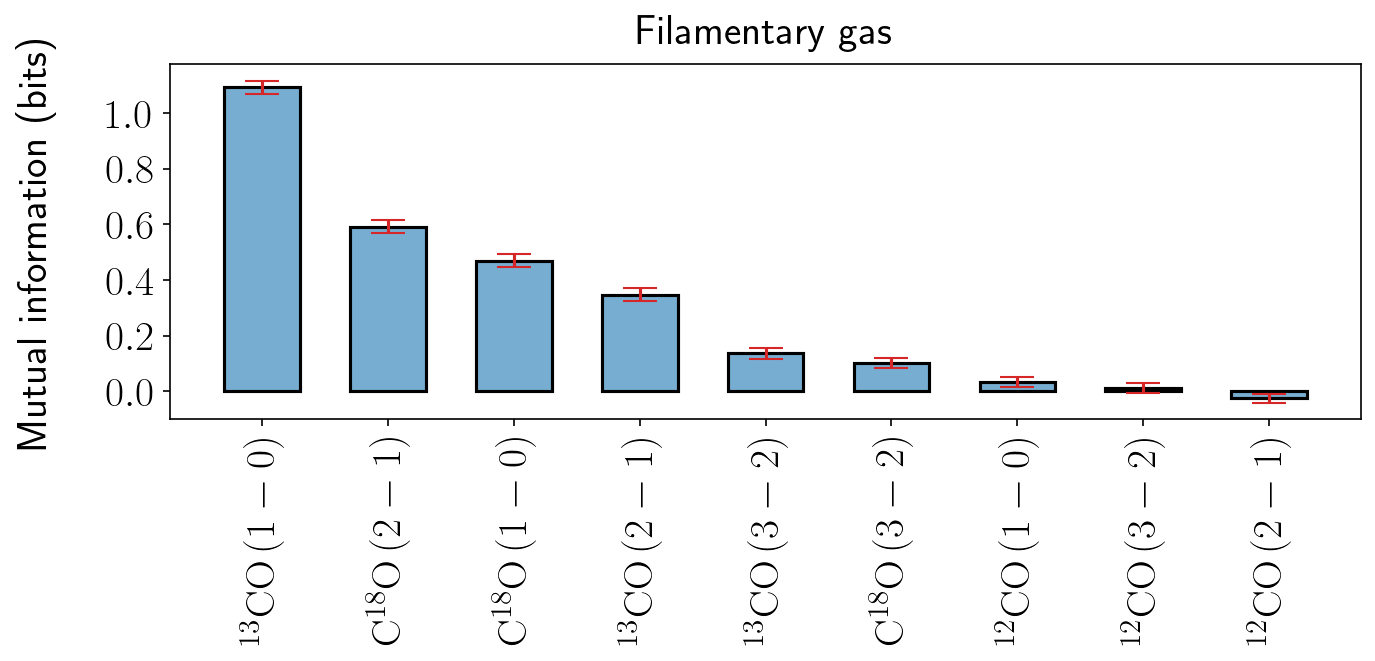

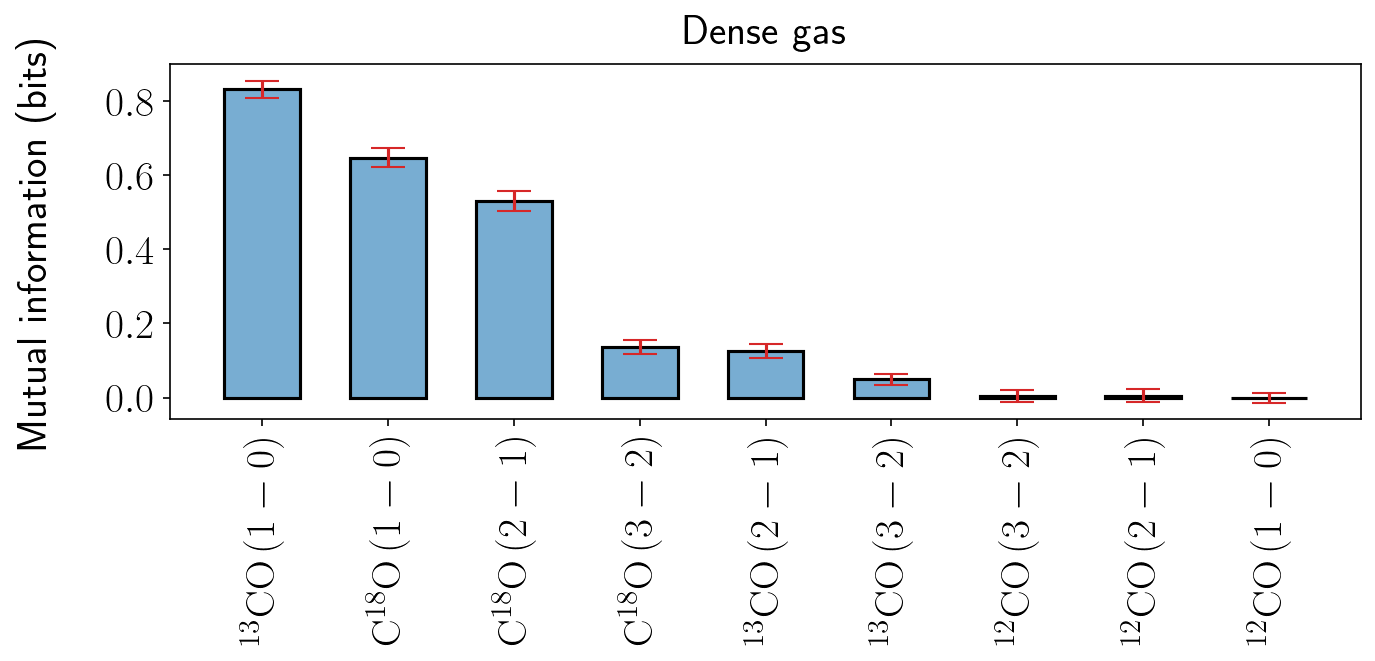

In [17]:
regimes = ["diffuse", "translucent", "filamentary", "dense"]
for regime in regimes:

    plt.figure(figsize=(1.6 * 6.4, 1.6 * 0.4 * 4.8), dpi=150)

    infobs.plot_info_bars(
        lines,
        "Av",
        restriction=regime,
        errorbars=True,
        nfirst=None,
        display_transitions=True,
    )
    plt.title(f"{regime.capitalize()} gas", fontsize=20, pad=10)

    plt.show()

**Note:** The `Infobs.plot_info_bars` method should be seen as a simple, easy-to-use helpers for displaying mutual information values and the associated error bars. For more specific scripts, feel free to implement your own function by taking `Infobs.plot_info_bars` as a template.

## Information maps

In [18]:
n_samples = 200_000

samplers = {
    "Av": LogUniform(1, 40),
    "G0": LogUniform(1, 1e5),
    "Pth": Constant(1e5),
    "angle": Constant(0.0),
}

global_kwargs = {
    "parameters": "Av",
    "xaxis_param": "Av",
    "yaxis_param": "G0",
}

computation_kwargs = {"points": 50, "progress_bar": True}

plot_kwargs = {"cmap": "jet"}

### Reference use case

In [19]:
infobs_maps = Infobs(instrument, n_samples, samplers, obstime=30)

infobs_maps.set_path(os.path.join("informativity", "maps"))

infobs_maps.set_regimes(regimes)

### Deep integration

In [20]:
infobs_maps_integ = Infobs(instrument, n_samples, samplers, obstime=300)

infobs_maps_integ.set_path(os.path.join("informativity", "maps-integration"))

infobs_maps_integ.set_regimes(regimes)

### Information maps for single lines

In [21]:
# Pre-compute maps to be able to get the pixel-wise maximum for colormaps

for line in ["co_v0_j1__v0_j0", "13c_o_j1__j0", "c_18o_j1__j0"]:

    infobs_maps.compute_map(line, **global_kwargs, **computation_kwargs)

# Get maximum mutual information

vmax = infobs_maps.get_info_maps_max(
    ["co_v0_j1__v0_j0", "13c_o_j1__j0", "c_18o_j1__j0"], **global_kwargs
)

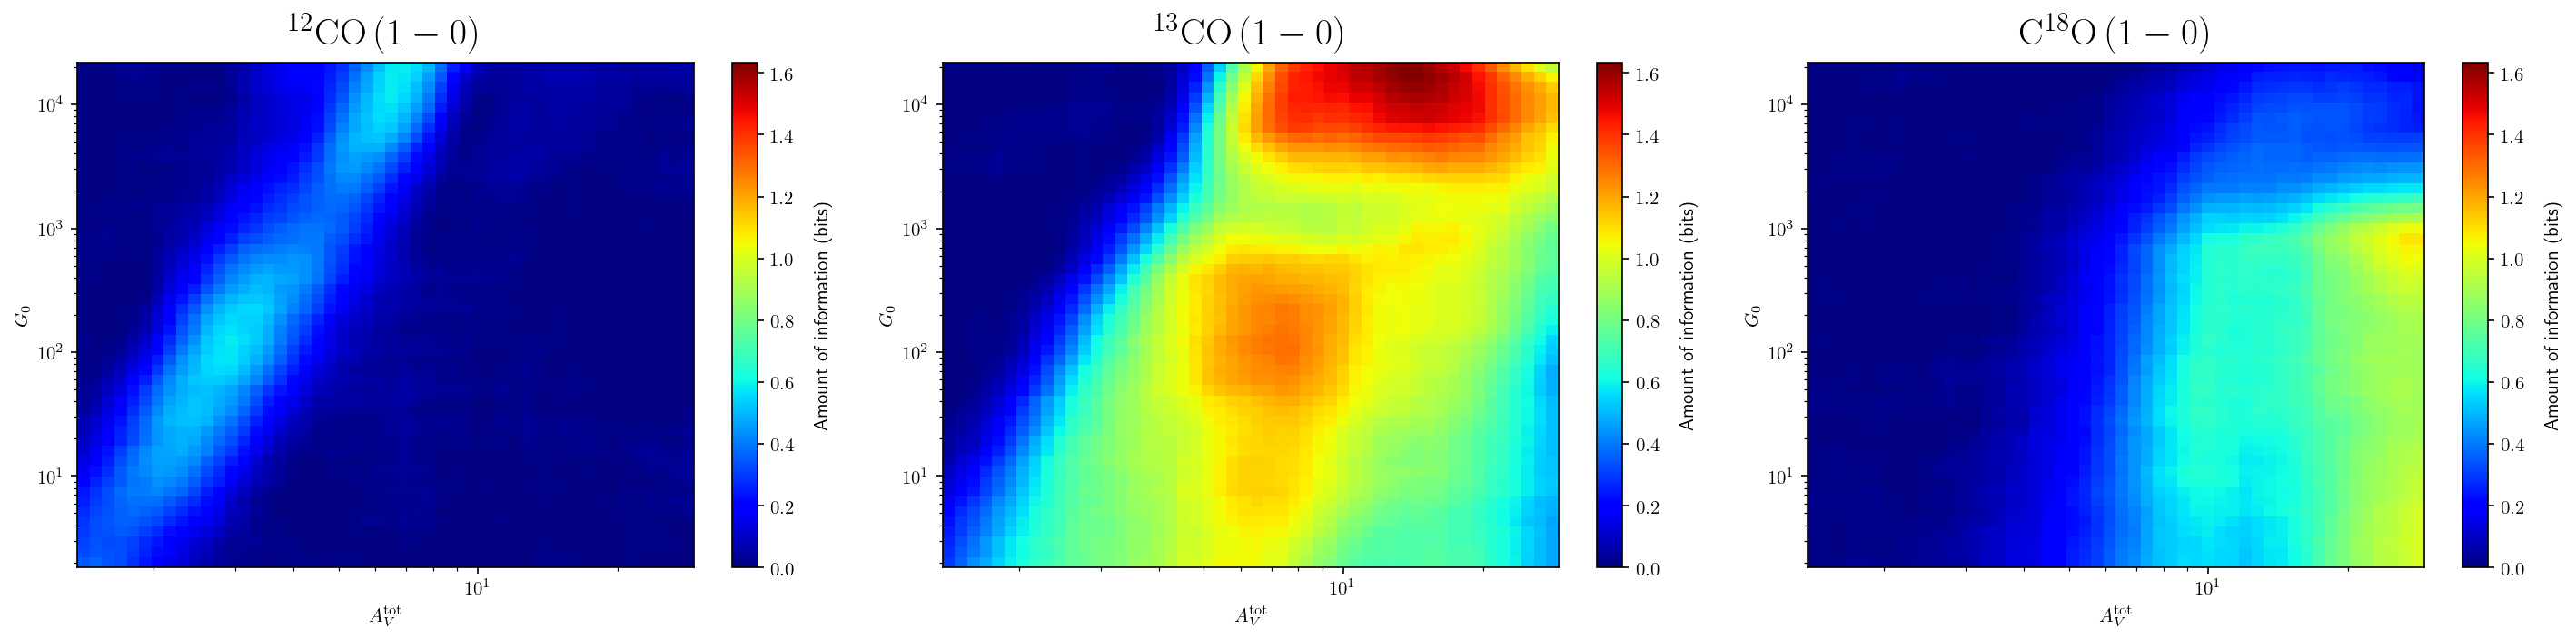

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(3 * 6.4, 4.8), dpi=150)
axs = axs.flatten()

# 12C0

line = "co_v0_j1__v0_j0"
plt.sca(axs[0])

infobs_maps.plot_info_map(line, **global_kwargs, **plot_kwargs, vmax=vmax)
plt.title(f"${infobs_maps.plotter.line_formatter(line)}$", fontsize=20, pad=10)

# 13C0

line = "13c_o_j1__j0"
plt.sca(axs[1])

infobs_maps.plot_info_map(line, **global_kwargs, **plot_kwargs, vmax=vmax)
plt.title(f"${infobs_maps.plotter.line_formatter(line)}$", fontsize=20, pad=10)

# C180

line = "c_18o_j1__j0"
plt.sca(axs[2])

infobs_maps.plot_info_map(line, **global_kwargs, **plot_kwargs, vmax=vmax)
plt.title(f"${infobs_maps.plotter.line_formatter(line)}$", fontsize=20, pad=10)

plt.tight_layout()
plt.show()

### Influence of integration time

In [23]:
line = "c_18o_j1__j0"

# Pre-compute maps to be able to get the pixel-wise maximum for colormaps

infobs_maps.compute_map(line, **global_kwargs, **computation_kwargs)

infobs_integ.compute_map(line, **global_kwargs, **computation_kwargs)

# Get maximum mutual information

vmax = max(
    infobs_maps.get_info_maps_max(
        [line],
        **global_kwargs,
    ),
    infobs_maps_integ.get_info_maps_max(
        [line],
        **global_kwargs,
    ),
)

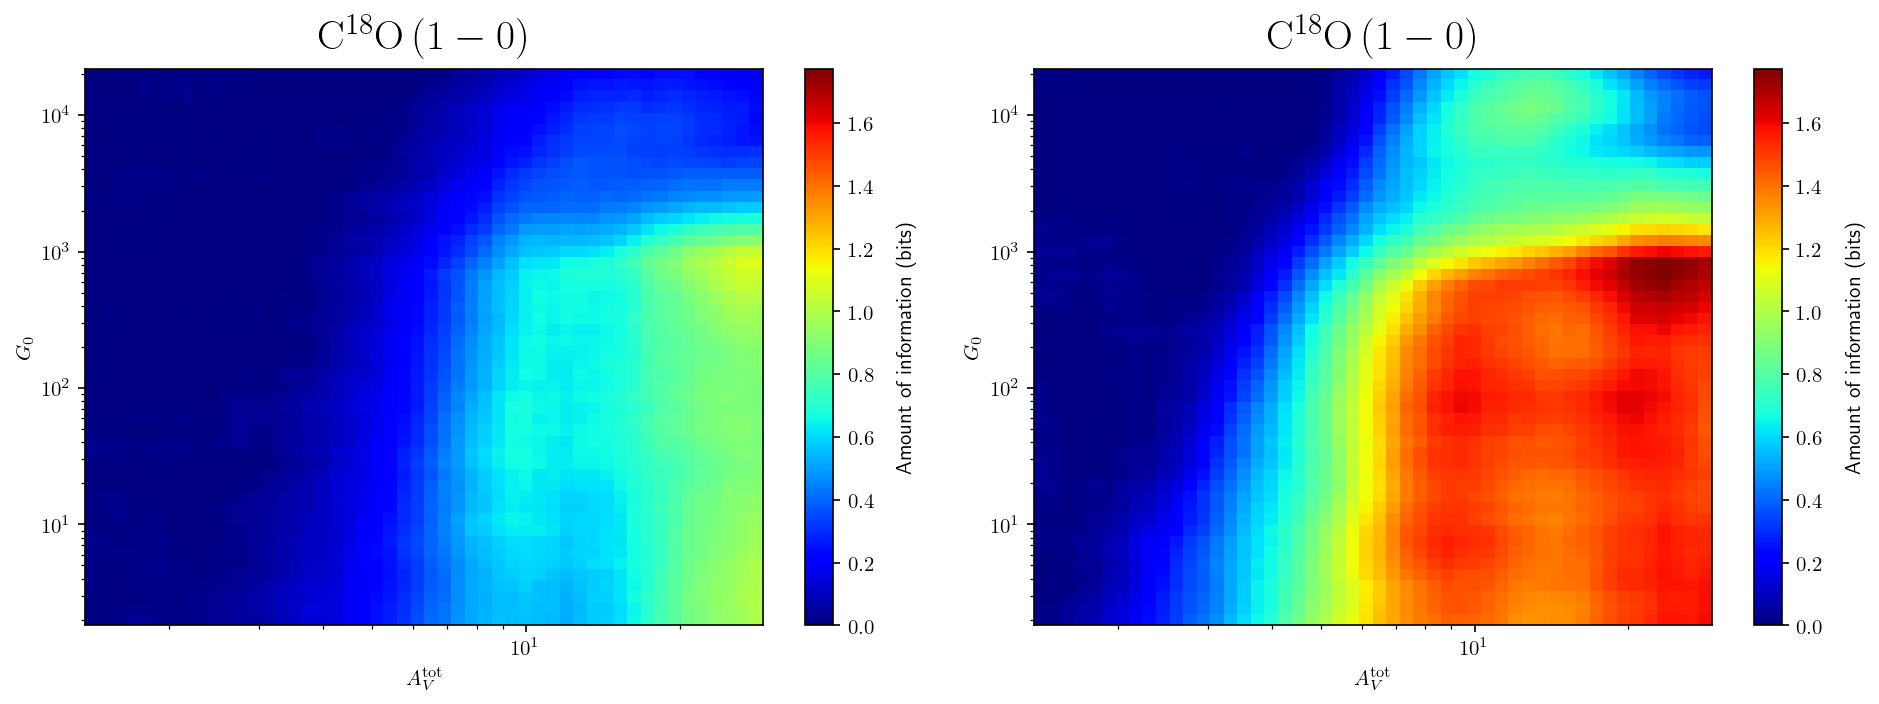

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(2 * 6.4, 4.8), dpi=150)
axs = axs.flatten()

# Reference

plt.sca(axs[0])

infobs_maps.plot_info_map(line, **global_kwargs, **plot_kwargs, vmax=vmax)
plt.title(f"${infobs_maps.plotter.line_formatter(line)}$", fontsize=20, pad=10)

# 10 times longer integration

plt.sca(axs[1])

infobs_maps_integ.plot_info_map(line, **global_kwargs, **plot_kwargs, vmax=vmax)
plt.title(f"${infobs_maps_integ.plotter.line_formatter(line)}$", fontsize=20, pad=10)

plt.tight_layout()
plt.show()

### Influence of combining lines

In [26]:
lines = ["co_v0_j1__v0_j0", "13c_o_j1__j0", "c_18o_j1__j0"]

infobs_maps.compute_map(lines, **global_kwargs, **computation_kwargs)

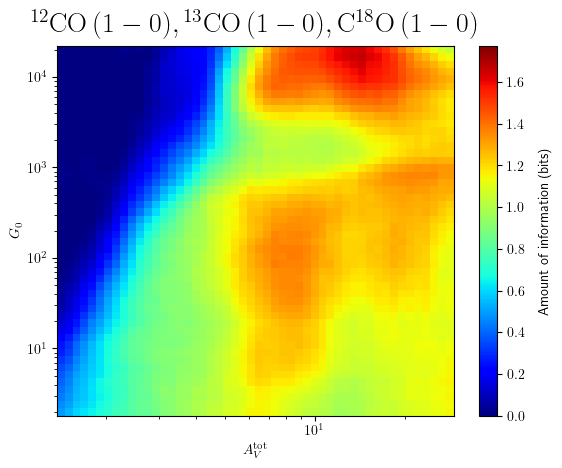

In [29]:
fig = plt.figure(dpi=100)

infobs_maps.plot_info_map(lines, **global_kwargs, **plot_kwargs, vmax=vmax)
plt.title(f"${infobs_maps.plotter.lines_comb_formatter(lines)}$", fontsize=20, pad=10)

plt.show()

**Note:** The `Infobs.plot_info_map` method should be seen as a simple, easy-to-use helpers for displaying mutual information maps. For more specific scripts, feel free to implement your own function by taking `Infobs.plot_info_map` as a template.